In [1]:
using LogTopReg, Distributions

In [2]:
σ_μ = 0.5;
σ = 0.5;
σ_A = [0.0,1.0,2.0,3.0];
σ_β = 0.0;

n = 200;
p = 2;
nd = repeat([50],inner=[n]);
guh = sample([0.0,1.0],n);
A = guh*guh' + I;
UA = chol(A);
K = 4;
y = Vector{Array{Int64,2}}(n);
μ = randn(K)*σ_μ;
β = randn(K,p)*σ_β;
X = randn(p,n);
g = randn(K,n)*UA;

In [3]:
θ = linspace(0.1,K*2,K).^2;
η = Array{Float64}(K,n);
nk = Array{Int64}(K,n);
for i in 1:n
    η[:,i] = randn(K).*σ .+ μ + β*X[:,i] + σ_A.*g[:,i];
    nk[:,i] = rand(Multinomial(nd[i],softmax(η[:,i])));
    y[i] = hcat(map(j -> hcat(rand(Poisson(θ[j]),nk[j,i]),rand(Poisson(θ[K:-1:1][j]),nk[j,i]))', 1:K)...);
end

In [7]:
pss = VectorPosterior(PoissonPosterior(0.1,0.1),2);
@time fit = topiclmm(y,X,A,pss,K,hyperparameter(),iter=1000);

 87.473443 seconds (592.55 M allocations: 32.615 GB, 3.50% gc time)


In [9]:
using DataFrames, Gadfly

In [11]:
ns = length(fit[:τ])

1000

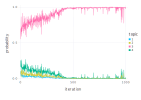

In [13]:
mudat = DataFrame(probability = mapslices(softmax,fit[:μ],1)[:],topic=repeat(map(string,1:K),outer=[ns]),
iteration=repeat(collect(1:ns),inner=[K]));
plot(mudat,x="iteration",y="probability",color="topic",Geom.line)